In [3]:
## Intalar las librerias
defaultW <- getOption("warn")
options(warn = -1)
library(RNetCDF)
library(raster)
library(sp)
library(readxl)
library(rgeos)
library(lubridate)
Sys.setlocale("LC_TIME", "English") #setear en ingles el idioma
Sys.setenv(TZ = "EST") #swtear zona horaria

rgeos version: 0.5-5, (SVN revision 640)
 GEOS runtime version: 3.8.0-CAPI-1.13.1 
 Linking to sp version: 1.4-2 
 Polygon checking: TRUE 


Attaching package: 'lubridate'

The following objects are masked from 'package:rgeos':

    intersect, setdiff, union

The following objects are masked from 'package:raster':

    intersect, union

The following objects are masked from 'package:base':

    date, intersect, setdiff, union



[1] "English_United States.1252"

In [5]:
#Abrir Datos actualizados - Julio 2021
BASE = read_excel("BASE.xlsx")

In [6]:
BASE$FECHA = as.Date(BASE$FECHA)
mes = month(max(BASE$FECHA,na.rm = T),label = T,abbr = T)
anio = year(max(BASE$FECHA,na.rm = T))

### Ahora vamos a descargar la Data de Temperatura Superficial del Mar de la NOAA
#### Link = https://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCDC/.ERSST/.version5/.sst/Y/%2830S%29%2830N%29RANGEEDGES/X/%28160W%29%2860W%29RANGEEDGES/T/%28Jan%201915%29%28Jul%202021%29RANGEEDGES/datafiles.html

In [9]:
#Descargar Archivo Netcdf
fname = paste0("https://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCDC/.ERSST/.version5/.sst/Y/%2830S%29%2830N%29RANGEEDGES/X/%28160W%29%2860W%29RANGEEDGES/T/%28Jan%201915%29%28",mes,"%20",anio,"%29RANGEEDGES/data.nc")
download.file(fname,destfile = "data.nc", mode = 'wb')

#### Formatiamos las imagenes con sus limites utilizados en el corte, 160W a 60W en longitud, 30S a 30N en latitud

In [10]:
#ERSST version 5 (160W to 60W,30S to 30N), resolucion 1 Grado, 100 km
SST=RNetCDF::read.nc(RNetCDF::open.nc("data.nc"))
#Que empieza en -180
SST$X=SST$X-180
#funcion para rotar una matriz
rot=function(x) t(apply(x,2,rev))
SSTF=lapply(1:dim(SST$sst)[3],function(i)  raster(rot(rot(rot(SST$sst[,,i])))))

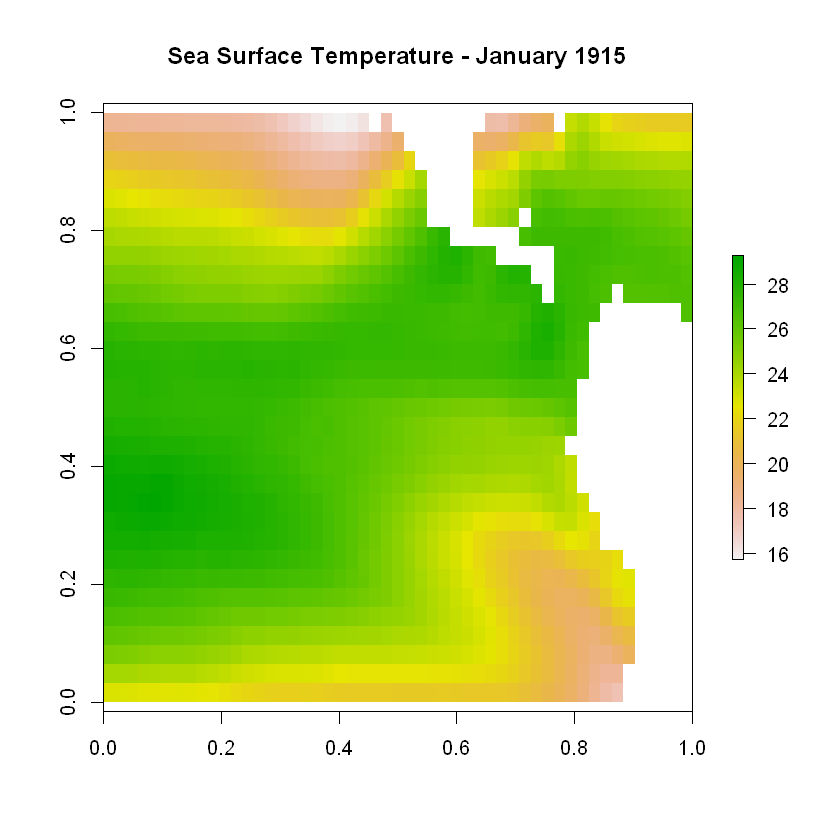

In [13]:
plot(SSTF[[1]], main = "Sea Surface Temperature - January 1915")

In [11]:
# Variable Tiempo para la serie de Tiempo
Tiempo=as.character(seq(as.Date("1915-01-01"),by = "month", len=nrow(BASE)))

In [12]:
Tiempo

[1] "1915-01-01" "1915-02-01" "1915-03-01" "1915-04-01" "1915-05-01"
   [6] "1915-06-01" "1915-07-01" "1915-08-01" "1915-09-01" "1915-10-01"
  [11] "1915-11-01" "1915-12-01" "1916-01-01" "1916-02-01" "1916-03-01"
  [16] "1916-04-01" "1916-05-01" "1916-06-01" "1916-07-01" "1916-08-01"
  [21] "1916-09-01" "1916-10-01" "1916-11-01" "1916-12-01" "1917-01-01"
  [26] "1917-02-01" "1917-03-01" "1917-04-01" "1917-05-01" "1917-06-01"
  [31] "1917-07-01" "1917-08-01" "1917-09-01" "1917-10-01" "1917-11-01"
  [36] "1917-12-01" "1918-01-01" "1918-02-01" "1918-03-01" "1918-04-01"
  [41] "1918-05-01" "1918-06-01" "1918-07-01" "1918-08-01" "1918-09-01"
  [46] "1918-10-01" "1918-11-01" "1918-12-01" "1919-01-01" "1919-02-01"
  [51] "1919-03-01" "1919-04-01" "1919-05-01" "1919-06-01" "1919-07-01"
  [56] "1919-08-01" "1919-09-01" "1919-10-01" "1919-11-01" "1919-12-01"
  [61] "1920-01-01" "1920-02-01" "1920-03-01" "1920-04-01" "1920-05-01"
  [66] "1920-06-01" "1920-07-01" "1920-08-01" "1920-09-01" "1920-10-01"
  [71] "1920-11-01" "1920-12-01" "1921-01-01" "1921-02-01" "1921-03-01"
  [76] "1921-04-01" "1921-05-01" "1921-06-01" "1921-07-01" "1921-08-01"
  [81] "1921-09-01" "1921-10-01" "1921-11-01" "1921-12-01" "1922-01-01"
  [86] "1922-02-01" "1922-03-01" "1922-04-01" "1922-05-01" "1922-06-01"
  [91] "1922-07-01" "1922-08-01" "1922-09-01" "1922-10-01" "1922-11-01"
  [96] "1922-12-01" "1923-01-01" "1923-02-01" "1923-03-01" "1923-04-01"
 [101] "1923-05-01" "1923-06-01" "1923-07-01" "1923-08-01" "1923-09-01"
 [106] "1923-10-01" "1923-11-01" "1923-12-01" "1924-01-01" "1924-02-01"
 [111] "1924-03-01" "1924-04-01" "1924-05-01" "1924-06-01" "1924-07-01"
 [116] "1924-08-01" "1924-09-01" "1924-10-01" "1924-11-01" "1924-12-01"
 [121] "1925-01-01" "1925-02-01" "1925-03-01" "1925-04-01" "1925-05-01"
 [126] "1925-06-01" "1925-07-01" "1925-08-01" "1925-09-01" "1925-10-01"
 [131] "1925-11-01" "1925-12-01" "1926-01-01" "1926-02-01" "1926-03-01"
 [136] "1926-04-01" "1926-05-01" "1926-06-01" "1926-07-01" "1926-08-01"
 [141] "1926-09-01" "1926-10-01" "1926-11-01" "1926-12-01" "1927-01-01"
 [146] "1927-02-01" "1927-03-01" "1927-04-01" "1927-05-01" "1927-06-01"
 [151] "1927-07-01" "1927-08-01" "1927-09-01" "1927-10-01" "1927-11-01"
 [156] "1927-12-01" "1928-01-01" "1928-02-01" "1928-03-01" "1928-04-01"
 [161] "1928-05-01" "1928-06-01" "1928-07-01" "1928-08-01" "1928-09-01"
 [166] "1928-10-01" "1928-11-01" "1928-12-01" "1929-01-01" "1929-02-01"
 [171] "1929-03-01" "1929-04-01" "1929-05-01" "1929-06-01" "1929-07-01"
 [176] "1929-08-01" "1929-09-01" "1929-10-01" "1929-11-01" "1929-12-01"
 [181] "1930-01-01" "1930-02-01" "1930-03-01" "1930-04-01" "1930-05-01"
 [186] "1930-06-01" "1930-07-01" "1930-08-01" "1930-09-01" "1930-10-01"
 [191] "1930-11-01" "1930-12-01" "1931-01-01" "1931-02-01" "1931-03-01"
 [196] "1931-04-01" "1931-05-01" "1931-06-01" "1931-07-01" "1931-08-01"
 [201] "1931-09-01" "1931-10-01" "1931-11-01" "1931-12-01" "1932-01-01"
 [206] "1932-02-01" "1932-03-01" "1932-04-01" "1932-05-01" "1932-06-01"
 [211] "1932-07-01" "1932-08-01" "1932-09-01" "1932-10-01" "1932-11-01"
 [216] "1932-12-01" "1933-01-01" "1933-02-01" "1933-03-01" "1933-04-01"
 [221] "1933-05-01" "1933-06-01" "1933-07-01" "1933-08-01" "1933-09-01"
 [226] "1933-10-01" "1933-11-01" "1933-12-01" "1934-01-01" "1934-02-01"
 [231] "1934-03-01" "1934-04-01" "1934-05-01" "1934-06-01" "1934-07-01"
 [236] "1934-08-01" "1934-09-01" "1934-10-01" "1934-11-01" "1934-12-01"
 [241] "1935-01-01" "1935-02-01" "1935-03-01" "1935-04-01" "1935-05-01"
 [246] "1935-06-01" "1935-07-01" "1935-08-01" "1935-09-01" "1935-10-01"
 [251] "1935-11-01" "1935-12-01" "1936-01-01" "1936-02-01" "1936-03-01"
 [256] "1936-04-01" "1936-05-01" "1936-06-01" "1936-07-01" "1936-08-01"
 [261] "1936-09-01" "1936-10-01" "1936-11-01" "1936-12-01" "1937-01-01"
 [266] "1937-02-01" "1937-03-01" "1937-04-01" "1937-05-01" "1937-06-01"
 [271] "1937-07-01" "1937-08-01" "1937-09-01" "1937-10-01" "1937-11-01"
 [276] "1937-12-01" "1938-01-01" "1938-02-0

#### Le damos la respectiva proyeccion a cada imagen, y la extension para ajustar a su resolucion normal

In [14]:
n=dim(SST$sst)[3]
for(i in 1:n)
{
  extent(SSTF[[i]])=extent(min(SST$X),max(SST$X),min(SST$Y),max(SST$Y))
  proj4string(SSTF[[i]])=CRS("+proj=longlat +datum=WGS84 +ellps=WGS84 +towgs84=0,0,0")
  names(SSTF[[i]])=paste0("SST",Tiempo[i],sep="_")
}

#### Vamos a crear imagenes con el valor de cada Precipitación, en una imagen de la misma resolucion de las Temperaturas Superfical del Mar, para sacar el mapa de correlación espacial, y conocer el poligono con la correlacion espacial mas significativas a las RR 

In [15]:
RR=BASE$RR
#Se reemplaza cada valor de la matriz por cada valor de precipitacion
MA=SSTF
for(i in 1:n) MA[[i]][!is.na(MA[[i]])]=RR[i]

#### Funcion que me permite sacar la correlacion espacial entre la Precipitacion y las Temperaturas Superficial del Mar

In [17]:
#Para conocer la correlacion espacial observada
ccf_raster=function(x,y)
{
  I=dim(x[[1]])[1]
  J=dim(x[[1]])[2]
  N=length(x)
  X=array(c(sapply(1:N, function(i) as.matrix(x[[i]]))), dim = c(I,J,N))
  Y=array(c(sapply(1:N, function(i) as.matrix(y[[i]]))), dim = c(I,J,N))
  COR=raster(t(sapply(1:I, function(i) sapply(1:J, function(j) cor(x=X[i,j,],y=Y[i,j,])))))
  extent(COR)=extent(x[[1]])
  proj4string(COR)=CRS("+proj=longlat +datum=WGS84 +ellps=WGS84 +towgs84=0,0,0")
  return(COR)
}


#### A continuación dibujaremos una linea de contorno con la correlacion mayor a 0.7, ese sera el area que utilizaremos ara cortar las imagenes

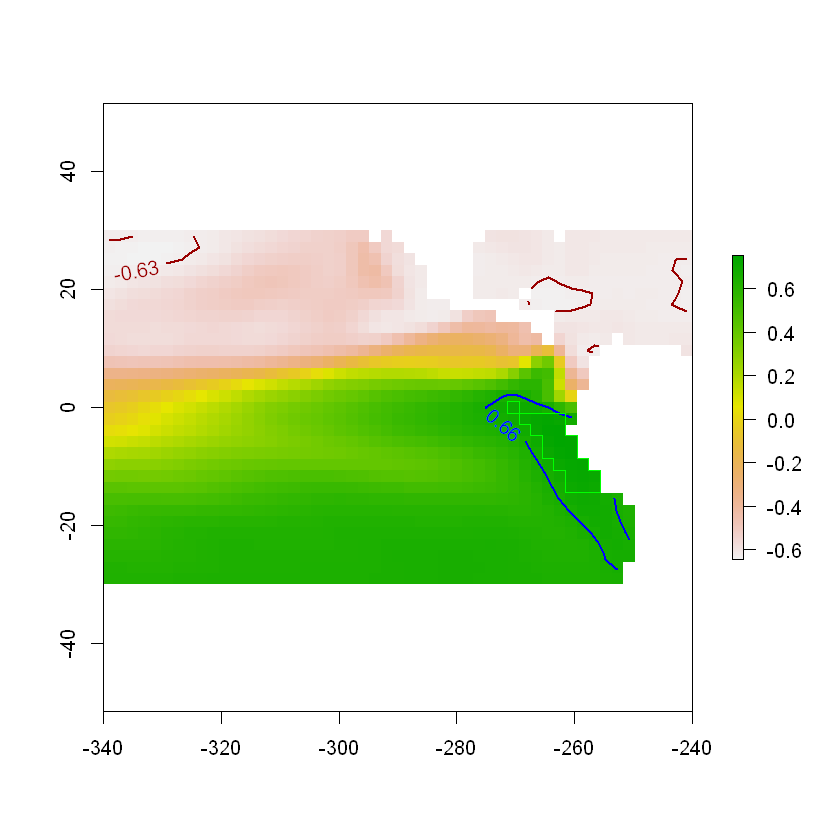

In [18]:
COR=ccf_raster(SSTF[(1:n)],MA[(1:n)])
#0.7 representa la correlacion en donde la isolinea es mayor, osea la mayor correlacion con el poligono
CORMAYOR=rasterToPolygons(COR,fun = function(x) x >= 0.7)
PCORMAYOR=gUnaryUnion(CORMAYOR)
#Ahora grafico la isolinea con correlacion 0.7
plot(COR)
contour(COR, levels=round(quantile(COR,c(0.05,0.95)),2),labcex = 1, col=c("#990000","blue"),add=TRUE,lwd=2)
lines(PCORMAYOR,col="green")

#### Ahora cortamos las imagenes con esa isolinea, y promediamos todos los pixeles dentro, tendremos 1 valor de Temperatura Superficial del Mar por mes desde 1915 hasta 2021

In [19]:
#Ahora cortamos esa zona con el poligono con mayor correlacion
SSTS = do.call(c,lapply(1:n, function(x) mean(as.matrix(mask(crop(SSTF[[x]],PCORMAYOR),PCORMAYOR)),na.rm=T)))
#Veamos la correlaacion entre la serie de Tiempo SST y RR
cor(RR,SSTS)

[1] 0.7458928

#### Por ultimo Guardamos el archivo en un Libro de Excel que utilizaremos en Pyton

In [21]:
#Vamos a Guardar todo en un solo archivo
BASE=data.frame(Fecha=Tiempo,RR=RR,SST=SSTS)
writexl::write_xlsx(BASE,"DATA.xlsx",col_names = T)

In [22]:
BASE

Fecha,RR,SST
1915-01-01,436.1,23.81849
1915-02-01,425.4,25.05968
1915-03-01,366.2,24.50934
1915-04-01,108.5,23.40319
1915-05-01,113.4,21.27035
1915-06-01,37.6,21.02337
1915-07-01,0.0,20.58357
1915-08-01,0.0,19.46284
1915-09-01,0.0,18.57292
1915-10-01,0.0,18.56997
